<h1>Probability Mass Function (PMF)</h1>

<h3><font color='grey'>What's the probability of exactly <i>x</i>?</font></h3>

<br>

In [6]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# style
from ipynb.fs.full.i_Style_Sheet import *
plt.style.use(style_use)
plt.rcParams.update(style_params)

# ColorSpace
from ipynb.fs.full.ii_ColorSpace import *
h = '89F4EC'
palettes = colorspace(h)
p = palettes['Switch Palette']

# data
f = r'Data\gss_general_social_survey.hdf5'
gss = pd.read_hdf(f)
gss.head()

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


In [2]:
# probability mass function
def pmf(data, col, norm):
    
    from empiricaldist import Pmf
    pmf = Pmf.from_seq(data[col], normalize=norm)
    
    pmf = pd.DataFrame(pmf)
    pmf.reset_index(inplace=True)
    pmf.columns = [col, 'probs']
    
    return pmf

# run
pmf_educ = pmf(gss, 'educ', True)
pmf_educ.head(5)

,educ,probs
0,0.0,0.002311
1,1.0,0.000610
2,2.0,0.002424
3,3.0,0.003948
4,4.0,0.004655


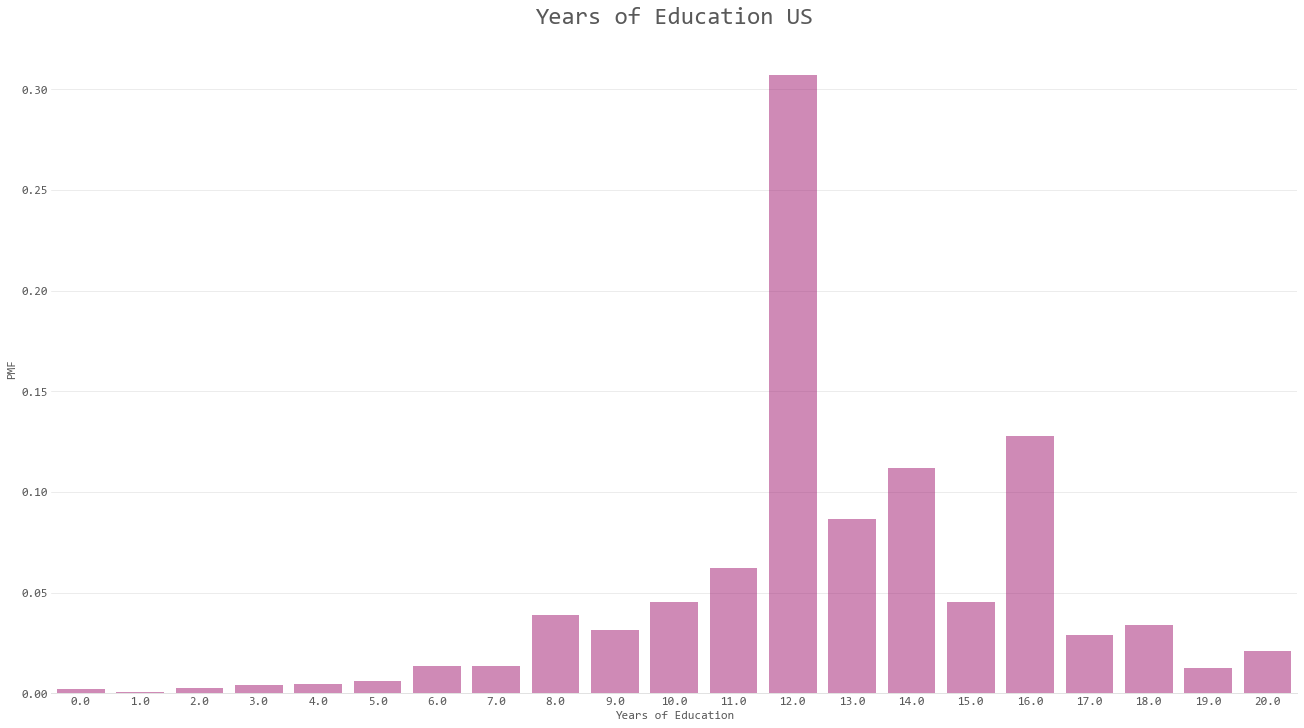

In [3]:
# pmf bar
def pmf_bar(ax, data, x, y, c, ttl, xlb, ylb):
    sns.barplot(ax=ax, data=data, x=x, y=y, color=c, alpha=0.5)
    ax.set_title(ttl)
    ax.set_xlabel(xlb)
    ax.set_ylabel(ylb)
    return ax

# viz
fig, ax = plt.subplots(1, 1, figsize=(18,10), constrained_layout=True)
pmf_bar(ax, pmf_educ, 'educ', 'probs', p[2], 'Years of Education US', 'Years of Education', 'PMF')
plt.show()